In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', 10)

In [5]:
c=pd.read_csv("/content/Hackathon_Data_May6.csv")
c.head()


,ParentSKU,Site Id,Year,Month,Category Name ID,Unit,Qty,Price,Net Sales calculated,Cash Discount,Amount to Customer,MRP,Pack Size,Pack Unit Id,State,Zone,Master Category,Size,Rank,Date
0,F0033,AHMEDABAD,2017,4,0,NO,1621.0,54,82557,20,93640,80.0,30.0,GM,DL,WEST2,3,30gm,4,2017-04-01
1,F0033,AHMEDABAD,2017,5,0,NO,651.0,51,31473,21,35760,80.0,30.0,GM,DL,WEST2,3,30gm,4,2017-05-01
2,F0033,AHMEDABAD,2017,6,0,NO,457.0,46,19580,12,22293,70.0,30.0,GM,DL,WEST2,3,30gm,4,2017-06-01
3,F0033,AHMEDABAD,2017,7,0,NO,1985.0,41,78144,0,78144,70.0,30.0,GM,DL,WEST2,3,30gm,4,2017-07-01
4,F0033,AHMEDABAD,2017,8,0,NO,6.0,38,228,0,228,70.0,30.0,GM,DL,WEST2,3,30gm,4,2017-08-01


# Cleaning Data Set

In [6]:
# c[c.isna().any(axis=1)]
c.isnull().sum()

ParentSKU           0
Site Id             0
Year                0
Month               0
Category Name ID    0
                   ..
Zone                0
Master Category     0
Size                0
Rank                0
Date                0
Length: 20, dtype: int64

In [0]:
# c.dropna().inplace=True

In [0]:
c["Profit"] = c["Amount to Customer"]-c["Net Sales calculated"]

In [9]:
c.groupby("Month")["Qty","Price","Net Sales calculated"].sum()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Qty,Price,Net Sales calculated
Month,,,
1,2106590.00,571852,240315889
2,2001288.00,544300,203909311
3,1374100.48,328990,137666845
4,1615123.00,462632,165518219
5,1934970.00,490233,193171582
...,...,...,...
8,2002470.00,504089,215193422
9,1909322.00,506679,203423635
10,1715158.00,501367,177770844


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


range(1, 13)


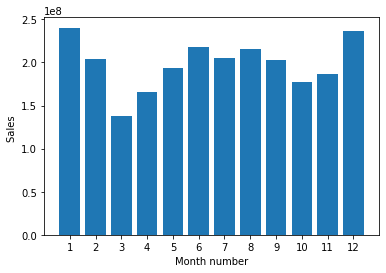

In [10]:
import matplotlib.pyplot as plt

months = range(1,13)
print(months)

plt.bar(months,c.groupby("Month")["Qty","Price","Net Sales calculated"].sum()['Net Sales calculated'])
plt.xticks(months)
plt.ylabel('Sales ')
plt.xlabel('Month number')
plt.show()

__Here We can say that 1 & 12 month has max sales because Ladies buy more cosmetic for party and also its new year__ 

In [11]:
# Checking which cites has Max sales
c.groupby("Site Id")["Qty","Price","Net Sales calculated"].sum()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Qty,Price,Net Sales calculated
Site Id,,,
AHMEDABAD,786735.00,273503,91862765
BANGALORE,980430.00,265741,121378560
BHUBANESWR,296196.00,237682,29916984
CHENNAI,502366.48,279070,58771457
DEHRADUN,232680.00,214907,21784491
...,...,...,...
PUNE,1555476.00,279185,156690876
RAIPUR,319809.00,250091,34065607
RANCHI,421122.00,248726,40302907


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


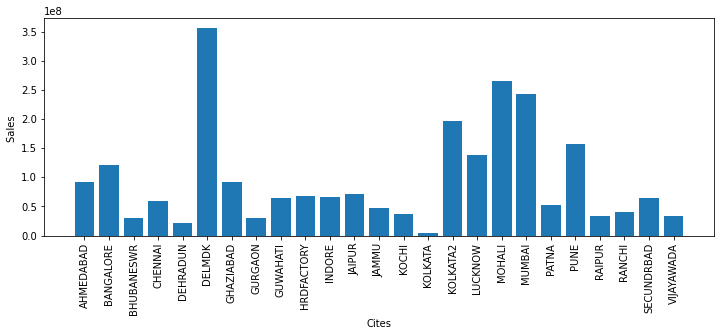

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))

keys = [city for city, df in c.groupby(['Site Id'])]

plt.bar(keys,c.groupby(["Site Id"])["Qty","Price","Net Sales calculated"].sum()['Net Sales calculated'])
plt.ylabel('Sales ')
plt.xlabel('Cites')
plt.xticks(keys, rotation='vertical', size=10)
plt.show()

__We can observe that sales is very less in Kolkata and then dehradun and so on..__

In [13]:
# Checking with category Name which cites has Maxx sales
c.groupby(["Site Id","Category Name ID"])["Qty","Price","Net Sales calculated"].sum()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


Qty   Price  Net Sales calculated
Site Id    Category Name ID                                        
AHMEDABAD  0                 187821.0    2945               7294380
           1                  55214.0   18692               6863209
           2                   9203.0    2653                382859
           3                   7604.0   39216               6066698
           4                  62811.0   27364              16237474
...                               ...     ...                   ...
VIJAYAWADA 4                   5227.0   26324               1340869
           5                    109.0    1847                 38240
           6                  26966.0   27769               4295124
           7                 168679.0  125633              18850287
           8                   1512.0   14105                490666

[219 rows x 3 columns]

In [14]:
# Checking which cites got less discount
pd.set_option('display.max_rows', None)
c.groupby(["Site Id","Cash Discount","Zone","Price"])["Qty","Net Sales calculated"].sum()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


Qty  Net Sales calculated
Site Id    Cash Discount Zone    Price                                 
AHMEDABAD  0             WEST    33       6793.00                194529
                                 34       2428.00                 63167
                                 35         66.00                  2116
                                 36        551.00                 19158
                                 37       4623.00                166048
                                 38      20022.00                760617
                                 39      31132.00               1124634
                                 40       3255.00                119299
                                 41       5313.00                214822
                                 42       4522.00                184236
                                 43      13775.00                491302
                                 44       3554.00                149714
                                 45       7995.00                346590
                                 46      13464.00                570689
                                 47       1449.00                 67126
                                 48       3421.00                150195
                                 49       2338.00                 94742
                                 50       2810.00                124388
                                 53       2172.00                 93903
                                 54        542.00                 28163
                                 55        577.00                 30689
                                 56       1837.00                 95420
                                 60       7180.00                423279
                                 61       8301.00                479845
                                 62      17334.00               1019536
                                 63      11274.00                652751
                                 64      17461.00               1022316
                                 65       2841.00                170315
                                 66       1217.00                 74962
                                 68        601.00                 38667
                                 69       1576.00                100562
                                 70        246.00                 16155
                                 87        250.00                 21125
                                 88        358.00                 30098
                                 89        939.00                 79770
                                 90        799.00                 68041
                                 91       1935.00                167331
                                 92       1520.00                134170
                                 93       1101.00                 97932
                                 94        432.00                 37949
                                 95       1591.00                142077
                                 96       2136.00                197637
                                 97       1096.00                101316
                                 98       2153.00                202993
                                 99       2061.00                198737
                                 100     30180.00               3011829
                                 101      4563.00                458546
                                 102      3297.00                338520
                                 103      2413.00                239433
                                 104      3599.00                361642
                                 105      3221.00                339613
                                 106      2016.00                208694
                                 107      4140.00                429757
                                 108      1976.00                202976
              

In [16]:
# The top revenue for the products 
c['Net Sales calculated'].groupby(c['ParentSKU']).max()

ParentSKU
F0033    1828740
F0034    1879850
F0089    5448294
F0091    1088584
F0094     921296
F0098    1025357
F0099    1240937
F0101     476066
F0112     298290
F0113     231401
F0140     325425
F0147     649061
F0167     292815
F0168     114889
F0193    2285459
F0194     325465
F0196     345027
F0199     165561
F0201     332673
F0202     199371
F0204     295346
F0206     245264
F0207     181961
F0210     168819
F0212     552347
F0214     302774
F0215     413040
F0216     463303
F0217     337587
F0218     343782
F0232     187686
F0233     217702
F0306     994989
F0307     821221
F0311     878468
F0319     522366
F0320     703671
F0321    1173169
F0328     622156
F0365     467364
F0367     384675
F0369     447089
F0371     378501
F0387    1346924
F0469    1602138
F0470     674137
F0607     379842
F0627     201057
F0641    4538737
F0642    4626858
F0643    1878105
T0270     799289
Name: Net Sales calculated, dtype: int64

__As From Above data we can analysis that Product - F0033 ( 1828740 ) has max Revenue__

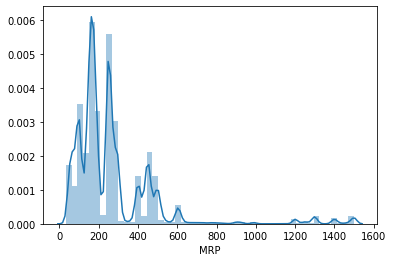

In [17]:
c['MRP']=c['MRP'].astype(int)
sns.distplot(c['MRP']);

__From Above graph we can analysis that Most of the product with common Mrp rates are between (150 to 250)__ 

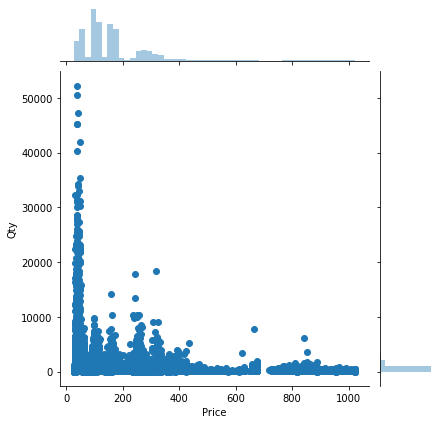

In [18]:
sns.jointplot(x="Price",y="Qty",data=c,kind='scatter');

__As we can see If Price Increases the Product Quantity decreases so we can target more on middle range or low price range product for more improvements__

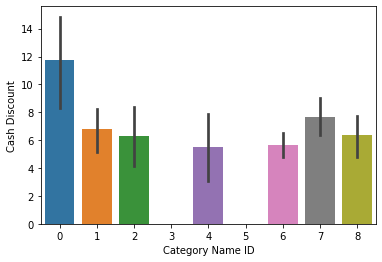

In [20]:
sns.barplot(x="Category Name ID",y="Cash Discount",data=c,estimator=np.std);

In [21]:
c.groupby(["Site Id","Category Name ID"])["Qty","Price","Net Sales calculated"].sum()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


Qty   Price  Net Sales calculated
Site Id    Category Name ID                                          
AHMEDABAD  0                  187821.00    2945               7294380
           1                   55214.00   18692               6863209
           2                    9203.00    2653                382859
           3                    7604.00   39216               6066698
           4                   62811.00   27364              16237474
           5                    1205.00    5542                400875
           6                   87163.00   32998              15519148
           7                  371526.00  128643              37707778
           8                    4188.00   15450               1390344
BANGALORE  0                  112679.00    2886               4312933
           1                   70235.00   18917               7980055
           2                   35122.00    3174               1669997
           3                    9316.00   36058               7236907
           4                   66286.00   27635              17035868
           5                    3776.00    5154               1164305
           6                  134302.00   29006              22345735
           7                  539712.00  126154              56778122
           8                    9002.00   16757               2854638
BHUBANESWR 0                   36120.00    2983               1409938
           1                   28240.00   18913               2943411
           2                   22316.00    2883                969791
           3                     542.00   32019                430662
           4                    2484.00   17837                599086
           6                   18091.00   29822               3440250
           7                  187509.00  123710              19828804
           8                     894.00    9515                295042
CHENNAI    0                   60207.00    3055               2369701
           1                   30896.00   18739               2893008
           2                   25369.00    3008               1228666
           3                    3237.00   38576               2588054
           4                   16044.00   28536               4071649
           5                    1169.00    4645                373478
           6                   60048.48   34229              10790585
           7                  301207.00  131771              33100141
           8                    4189.00   16511               1356175
DEHRADUN   0                   77955.00    2876               2987030
           1                    7918.00   13846                635567
           2                   12728.00    2909                542156
           3                     530.00   15324                429673
           4                    7256.00   24225               1826001
           5                     110.00    1435                 35891
           6                   20662.00   32036               3572815
           7                  105082.00  114746              11610213
           8                     439.00    7510                145145
DELMDK     0                 1419888.00    2968              56324104
           1                  146474.00   18925              20141196
           2                   46509.00    3161               2127239
           3                   19902.00   38911              15859123
           4                  227998.00   27976              59061440
           5                    6781.00    5320               2115496
           6                  300593.00   34898              58107927
           7                 1273954.00  127489             134097598
           8                   25808.00   17519               8309483
GHAZIABAD  0                  364998.00    2906              14389038
           1                   40330.00   19067               4709681
           2                   45447.00    331

__From Above Graph we can say that Category Name ID 3,4 has no discount rate and Category Name ID- 0 has highest number of discount rate__

In [30]:
c.Zone.value_counts()

EAST       8149
SOUTH      7698
NORTH      6416
WEST       4698
NORTH2     2362
NORTH1     1558
WEST1      1503
North       802
WEST2       502
East        360
West        249
North 1     216
North 2     213
South       178
North1       21
West1        18
south         7
Name: Zone, dtype: int64

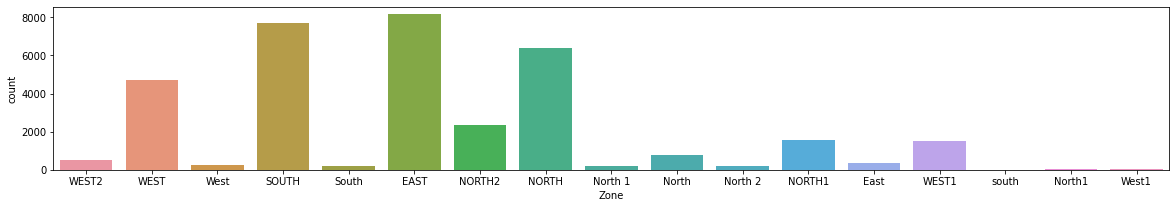

In [31]:
plt.figure(figsize=(20,3))
sns.countplot(x="Zone",data=c);


__From above Graph we can say that south , east ,north has max sales__

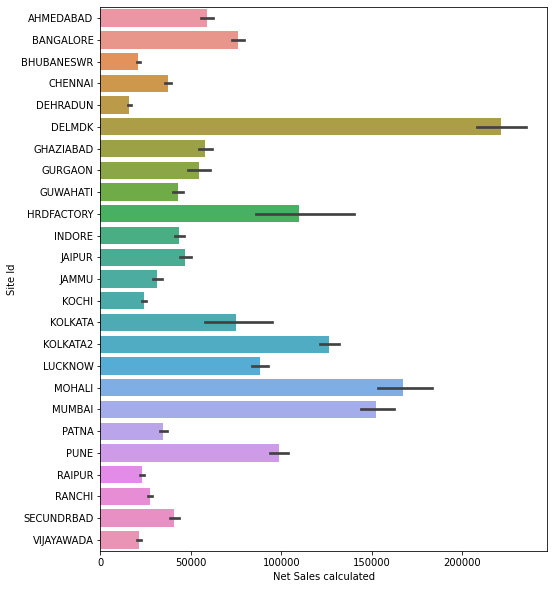

In [32]:
plt.figure(figsize=(8,10))
sns.barplot(x="Net Sales calculated",y="Site Id",data=c);

In [33]:

c['Net Sales calculated'].groupby(c['Site Id']).max()

Site Id
AHMEDABAD      667503
BANGALORE      522392
BHUBANESWR     150890
CHENNAI        432454
DEHRADUN       152944
DELMDK        2631579
GHAZIABAD      847513
GURGAON        754703
GUWAHATI       834042
HRDFACTORY    4626858
INDORE         561534
JAIPUR         726610
JAMMU          405339
KOCHI          265470
KOLKATA        281748
KOLKATA2      1712862
LUCKNOW        909235
MOHALI        5448294
MUMBAI        1649921
PATNA          783050
PUNE           868109
RAIPUR         157501
RANCHI         341386
SECUNDRBAD     470490
VIJAYAWADA     165274
Name: Net Sales calculated, dtype: int64

__As We can see Clearly that DELMDK has highest number of Net Sales but the Improvements areas are RAIPUR , VIJAYAWADA , RANCHI , DEHRADUN ,KOCHI__ 

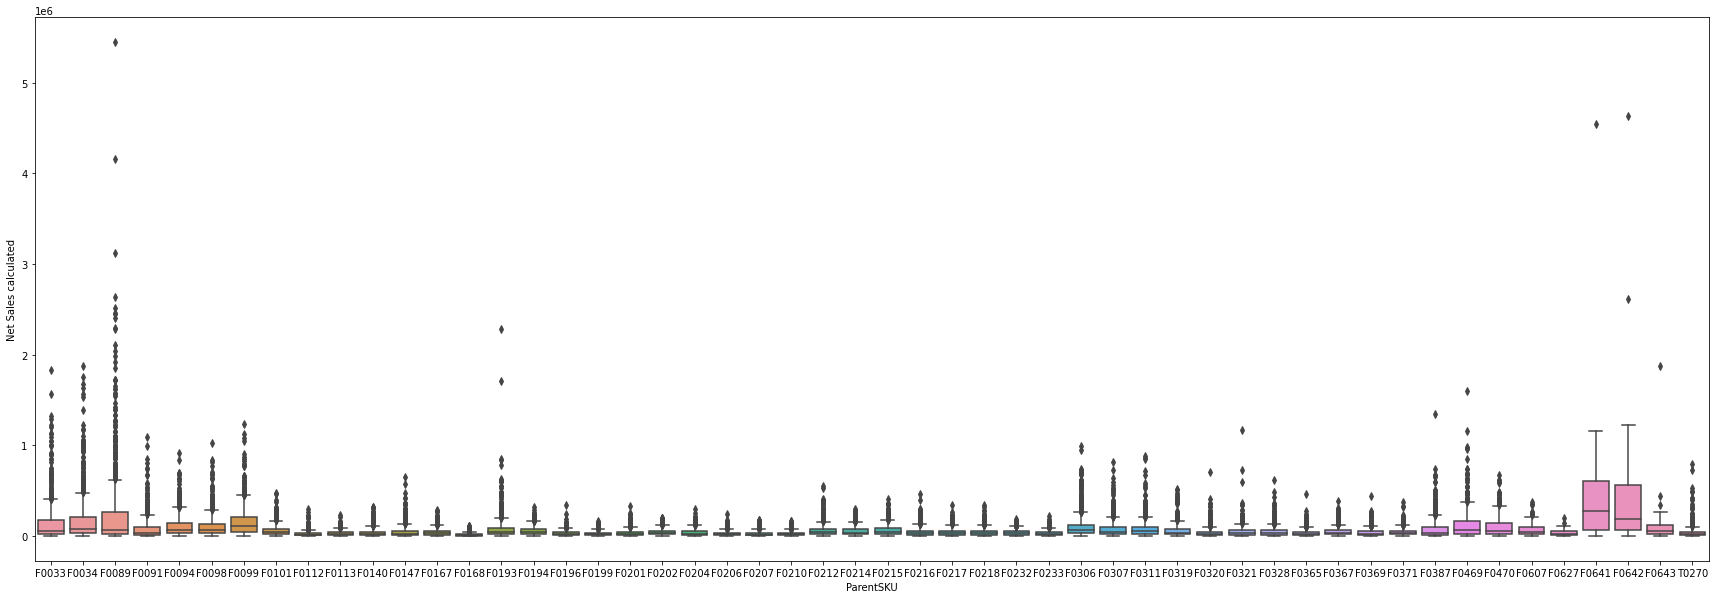

In [34]:
# Checking for Outliers
plt.figure(figsize=(30,10))
sns.boxplot(x="ParentSKU",y="Net Sales calculated",data=c);

__As we can analysis here product FOO89 has more number of Outlier so very less number of this product which has reaches highest number net sales__

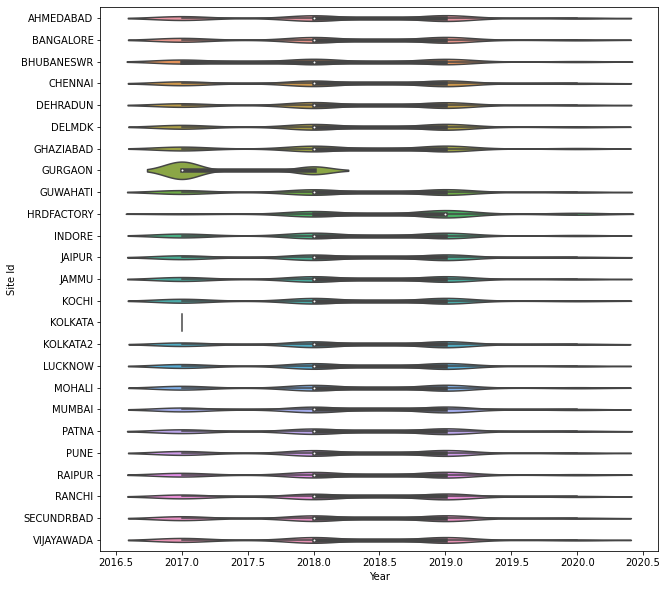

In [35]:
plt.figure(figsize=(10,10))
sns.violinplot(x="Year",y="Site Id",data=c);

__As we can see in kolkata there were no sales__

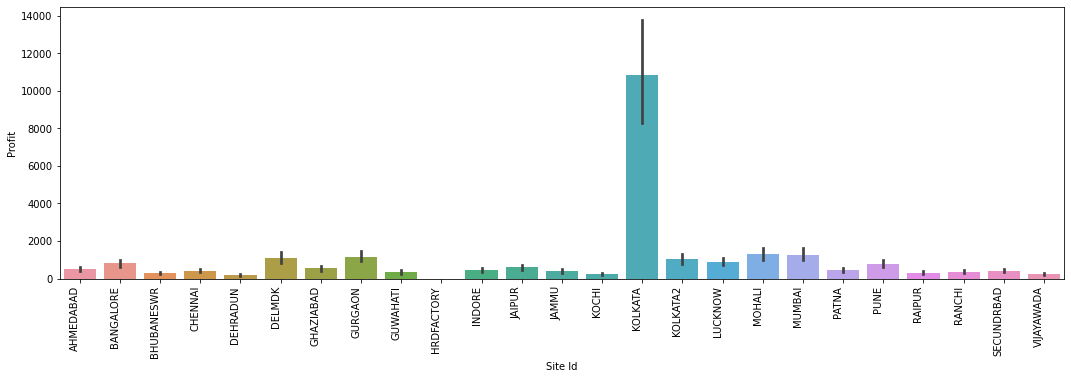

In [36]:
# Checking for Profit
plt.figure(figsize=(18,5))
sns.barplot(x="Site Id",y="Profit",data=c)
plt.xticks(rotation=90, horizontalalignment='right');

__As we can see from above graph GURGAON , KOLKATA has less sales or less quantity of product__

In [37]:
c["Site Id"].value_counts()

DELMDK        1607
MUMBAI        1600
BANGALORE     1595
MOHALI        1592
PUNE          1589
GHAZIABAD     1587
LUCKNOW       1577
CHENNAI       1576
SECUNDRBAD    1562
AHMEDABAD     1561
KOLKATA2      1557
VIJAYAWADA    1539
INDORE        1529
JAIPUR        1519
KOCHI         1519
GUWAHATI      1492
PATNA         1490
RAIPUR        1485
RANCHI        1485
JAMMU         1482
BHUBANESWR    1425
DEHRADUN      1363
HRDFACTORY     615
GURGAON        541
KOLKATA         63
Name: Site Id, dtype: int64

__As we can Compare with above cell that GURGAON , KOLKATA  has too less net sales has been generated__



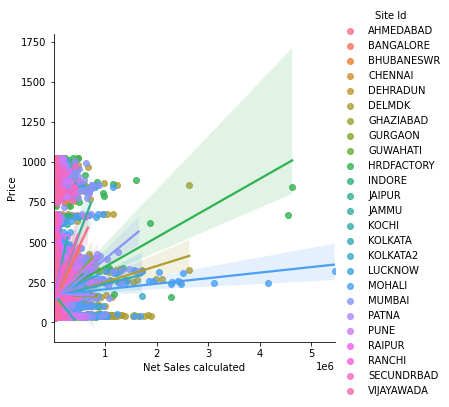

In [38]:
sns.lmplot(x="Net Sales calculated",y="Price",data=c,hue="Site Id");

## Proposed Hypothesis :

>Sales can be Increase by giving discount in cites like Kolkata where category 3,5 has no discount and also same Kolkata has more profit ratio.

>Sales can be increased in month of April to May as its Traveling Season.

>North zone should be focus more because there are very sales compared others.